# Análisis de nombres en la CDMX: Explorando los nombres más populares en la CDMX y sus tendencias

## Introducción

¿Cuáles han sido los nombres más populares en la CDMX desde el 2000? ¿Cómo ha cambiado la tendencia en el uso de ciertos nombres en los últimas décadas?

Para resolver estas preguntas y más, trabajaremos con el dataset de [nombres registrados en actas del Registro Civil](https://datos.cdmx.gob.mx/dataset/nombres-registrados-en-actas-del-registro-civil) de la CDMX, proporcionado por la Dirección General del Registro Civil y el Portal de Datos Abiertos de la CDMX.

Es importante mencionar que la idea y el método para este análisis provienen de Wes McKinney, cuyo [análisis](https://wesmckinney.com/book/data-analysis-examples#baby_names) está enfocado a Estados Unidos a nivel nacional.

## Preguntas interesantes

Basados en el dataset, queremos saber:
    
    1. ¿Cuáles fueron los nombres más populares en todo el periodo?
    2. ¿Cuáles fueron los nombres más populares en cada año?
    3. ¿Cómo ha cambiado la diversidad de nombres
    4. ¿Cómo ha cambiado la asignación de nombres de acuerdo a su género?
   

## Limpieza de los datos

In [3]:
# Se cargan las librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Se carga el csv
df = pd.read_csv(r"C:\Users\User\Downloads\nombres_anio_sexo_2000_2023.csv")

In [5]:
#Vista general
df.head()

,fecha,anio,sexo,nombre,personas
0,2000-12-31,2000,Hombre,A,6
1,2000-12-31,2000,Hombre,AARON,525
2,2000-12-31,2000,Hombre,AB,1
3,2000-12-31,2000,Hombre,ABAD,10
4,2000-12-31,2000,Hombre,ABAN,3


In [6]:
#Información básica del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191992 entries, 0 to 191991
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   fecha     191992 non-null  object
 1   anio      191992 non-null  int64 
 2   sexo      190950 non-null  object
 3   nombre    191971 non-null  object
 4   personas  191992 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 7.3+ MB


In [10]:
#Agrupando por año
df.groupby('anio')['personas'].sum()

anio
2000    337874
2001    325874
2002    325309
2003    343643
2004    343455
2005    314948
2006    315141
2007    320971
2008    317538
2009    306671
2010    293979
2011    283525
2012    272345
2013    256579
2014    245813
2015    231274
2016    217152
2017    198477
2018    177081
2019    162564
2020    139873
2021    125944
2022    117535
2023      5041
Name: personas, dtype: int64

Dado que el número de nombres que aparecen en el dataset disminuye considerablemente para el año 2023, no se condiran los datos del 2023

In [11]:
#Se borran los registros de 2023
df_sin_2023 = df.loc[df['anio'] != 2023]

## Análisis

Veamos cuáles han sido los nombres más populares en las últimas décadas, considerando todo el periodo.

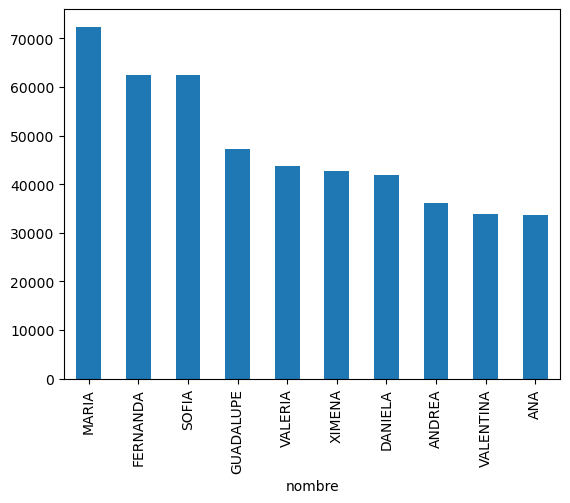

In [45]:
#se filtan mujeres
nombres_mujeres = df_sin_2023[df_sin_2023['sexo'] == 'Mujer']
#agrupamiento y top 10
nombres_mujeres_top_10 = nombres_mujeres.groupby('nombre')['personas'].sum().reset_index().sort_values(by='personas', ascending=False).head(10)
#gráfica de barras
nombres_mujeres_top_10.plot(x='nombre', y='personas', kind='bar', legend=False)
plt.show()

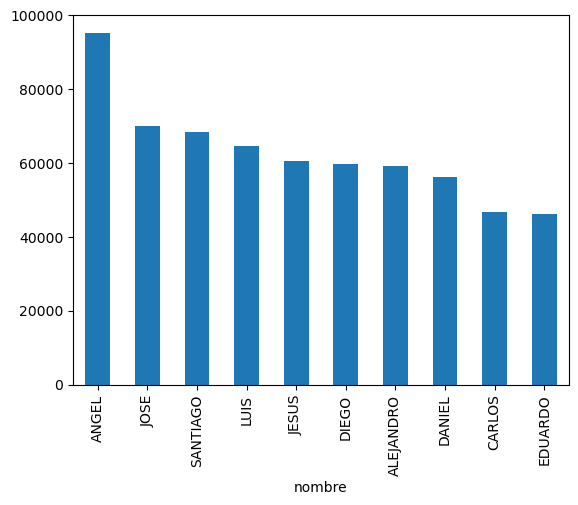

In [46]:
#se filtan hombres
nombres_hombres = df_sin_2023[df_sin_2023['sexo'] == 'Hombre']
#agrupamiento y top 10
nombres_hombres_top_10 = nombres_hombres.groupby('nombre')['personas'].sum().reset_index().sort_values(by='personas', ascending=False).head(10)
#gráfica de barras
nombres_hombres_top_10.plot(x='nombre', y='personas', kind='bar', legend=False)
plt.show()

Ahora vamos a ver cuáles fueron los nombres más populares para cada año dentro del periodo total

In [102]:
nombres_mujer_por_año = nombres_mujeres.groupby('anio')
nombres_mujeres_top_10_año = nombres_mujer_por_año.apply(lambda x: x.nlargest(10, 'personas')).reset_index(drop=True)
nombres_mujeres_top_10_año

,fecha,anio,sexo,nombre,personas
0,2000-12-31,2000,Mujer,MARIA,6001
1,2000-12-31,2000,Mujer,FERNANDA,4640
2,2000-12-31,2000,Mujer,GUADALUPE,3706
3,2000-12-31,2000,Mujer,ANDREA,3345
4,2000-12-31,2000,Mujer,DANIELA,2844
...,...,...,...,...,...
225,2022-12-31,2022,Mujer,ISABELLA,871
226,2022-12-31,2022,Mujer,MIA,835
227,2022-12-31,2022,Mujer,ROMINA,811
228,2022-12-31,2022,Mujer,AITANA,779


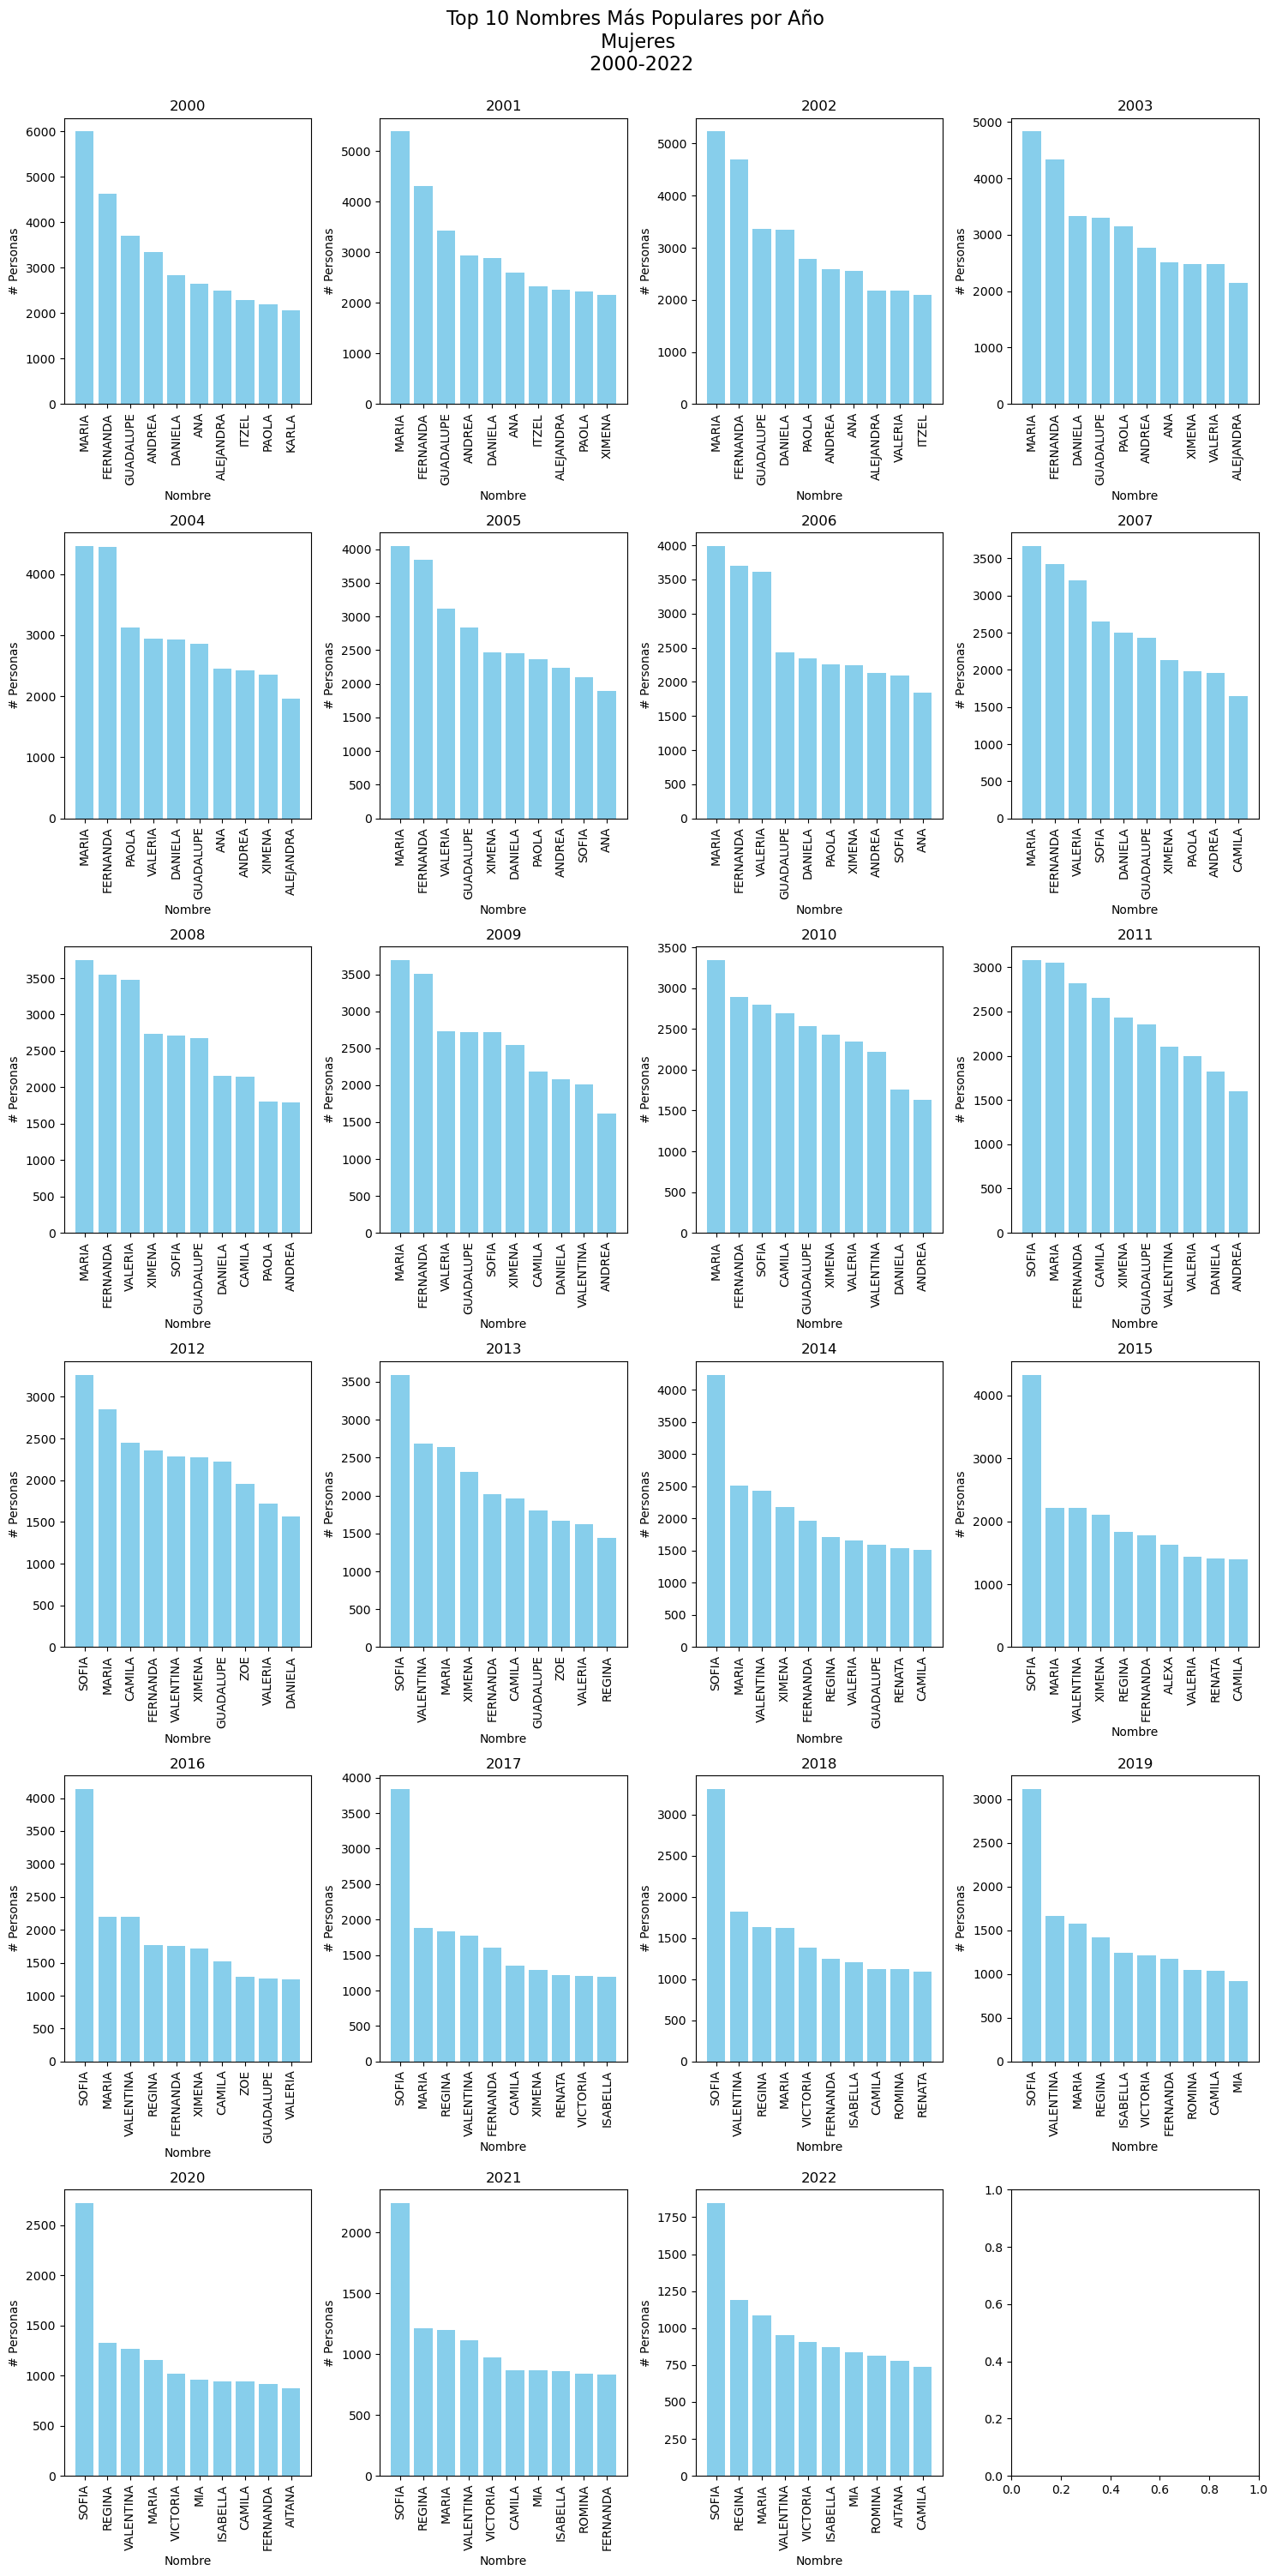

In [104]:
años = nombres_mujeres_top_10_año['anio'].unique()

# Configurar el número de filas y columnas de subplots
num_filas = 6
num_columnas = 4

# Crear una nueva figura y subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 5*num_filas))

# Iterar sobre cada año y sus datos correspondientes
for i, año in enumerate(años):
    # Seleccionar los nombres y las cantidades para el año actual
    datos_año = nombres_mujeres_top_10_año[nombres_mujeres_top_10_año['anio'] == año]
    nombres = datos_año['nombre']
    cantidades = datos_año['personas']
    
    # Calcular la posición del subplot actual
    fila = i // num_columnas
    columna = i % num_columnas
    
    # Crear la subgráfica de barras para el año actual
    axs[fila, columna].bar(nombres, cantidades, color='skyblue')
    
    # Configurar título y etiquetas
    axs[fila, columna].set_title(f'{año}')
    axs[fila, columna].set_xlabel('Nombre')
    axs[fila, columna].set_ylabel('# Personas')
    axs[fila, columna].tick_params(axis='x', rotation=90)
    #axs[fila, columna].invert_yaxis()  # Invertir el eje y para mostrar los nombres en orden descendente

# Ajustar el diseño de los subplots
plt.suptitle('Top 10 Nombres Más Populares por Año \n Mujeres \n 2000-2022', fontsize=16, y=1)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [92]:
nombres_hombre_por_año = nombres_hombres.groupby('anio')
nombres_hombres_top_10_año = nombres_hombre_por_año.apply(lambda x: x.nlargest(10, 'personas')).reset_index(drop=True)
nombres_hombres_top_10_año

,fecha,anio,sexo,nombre,personas
0,2000-12-31,2000,Hombre,LUIS,6047
1,2000-12-31,2000,Hombre,JOSE,5745
2,2000-12-31,2000,Hombre,JESUS,4521
3,2000-12-31,2000,Hombre,ANGEL,4495
4,2000-12-31,2000,Hombre,ALEJANDRO,4379
...,...,...,...,...,...
225,2022-12-31,2022,Hombre,MATIAS,1168
226,2022-12-31,2022,Hombre,ALEXANDER,960
227,2022-12-31,2022,Hombre,GAEL,900
228,2022-12-31,2022,Hombre,DANIEL,891


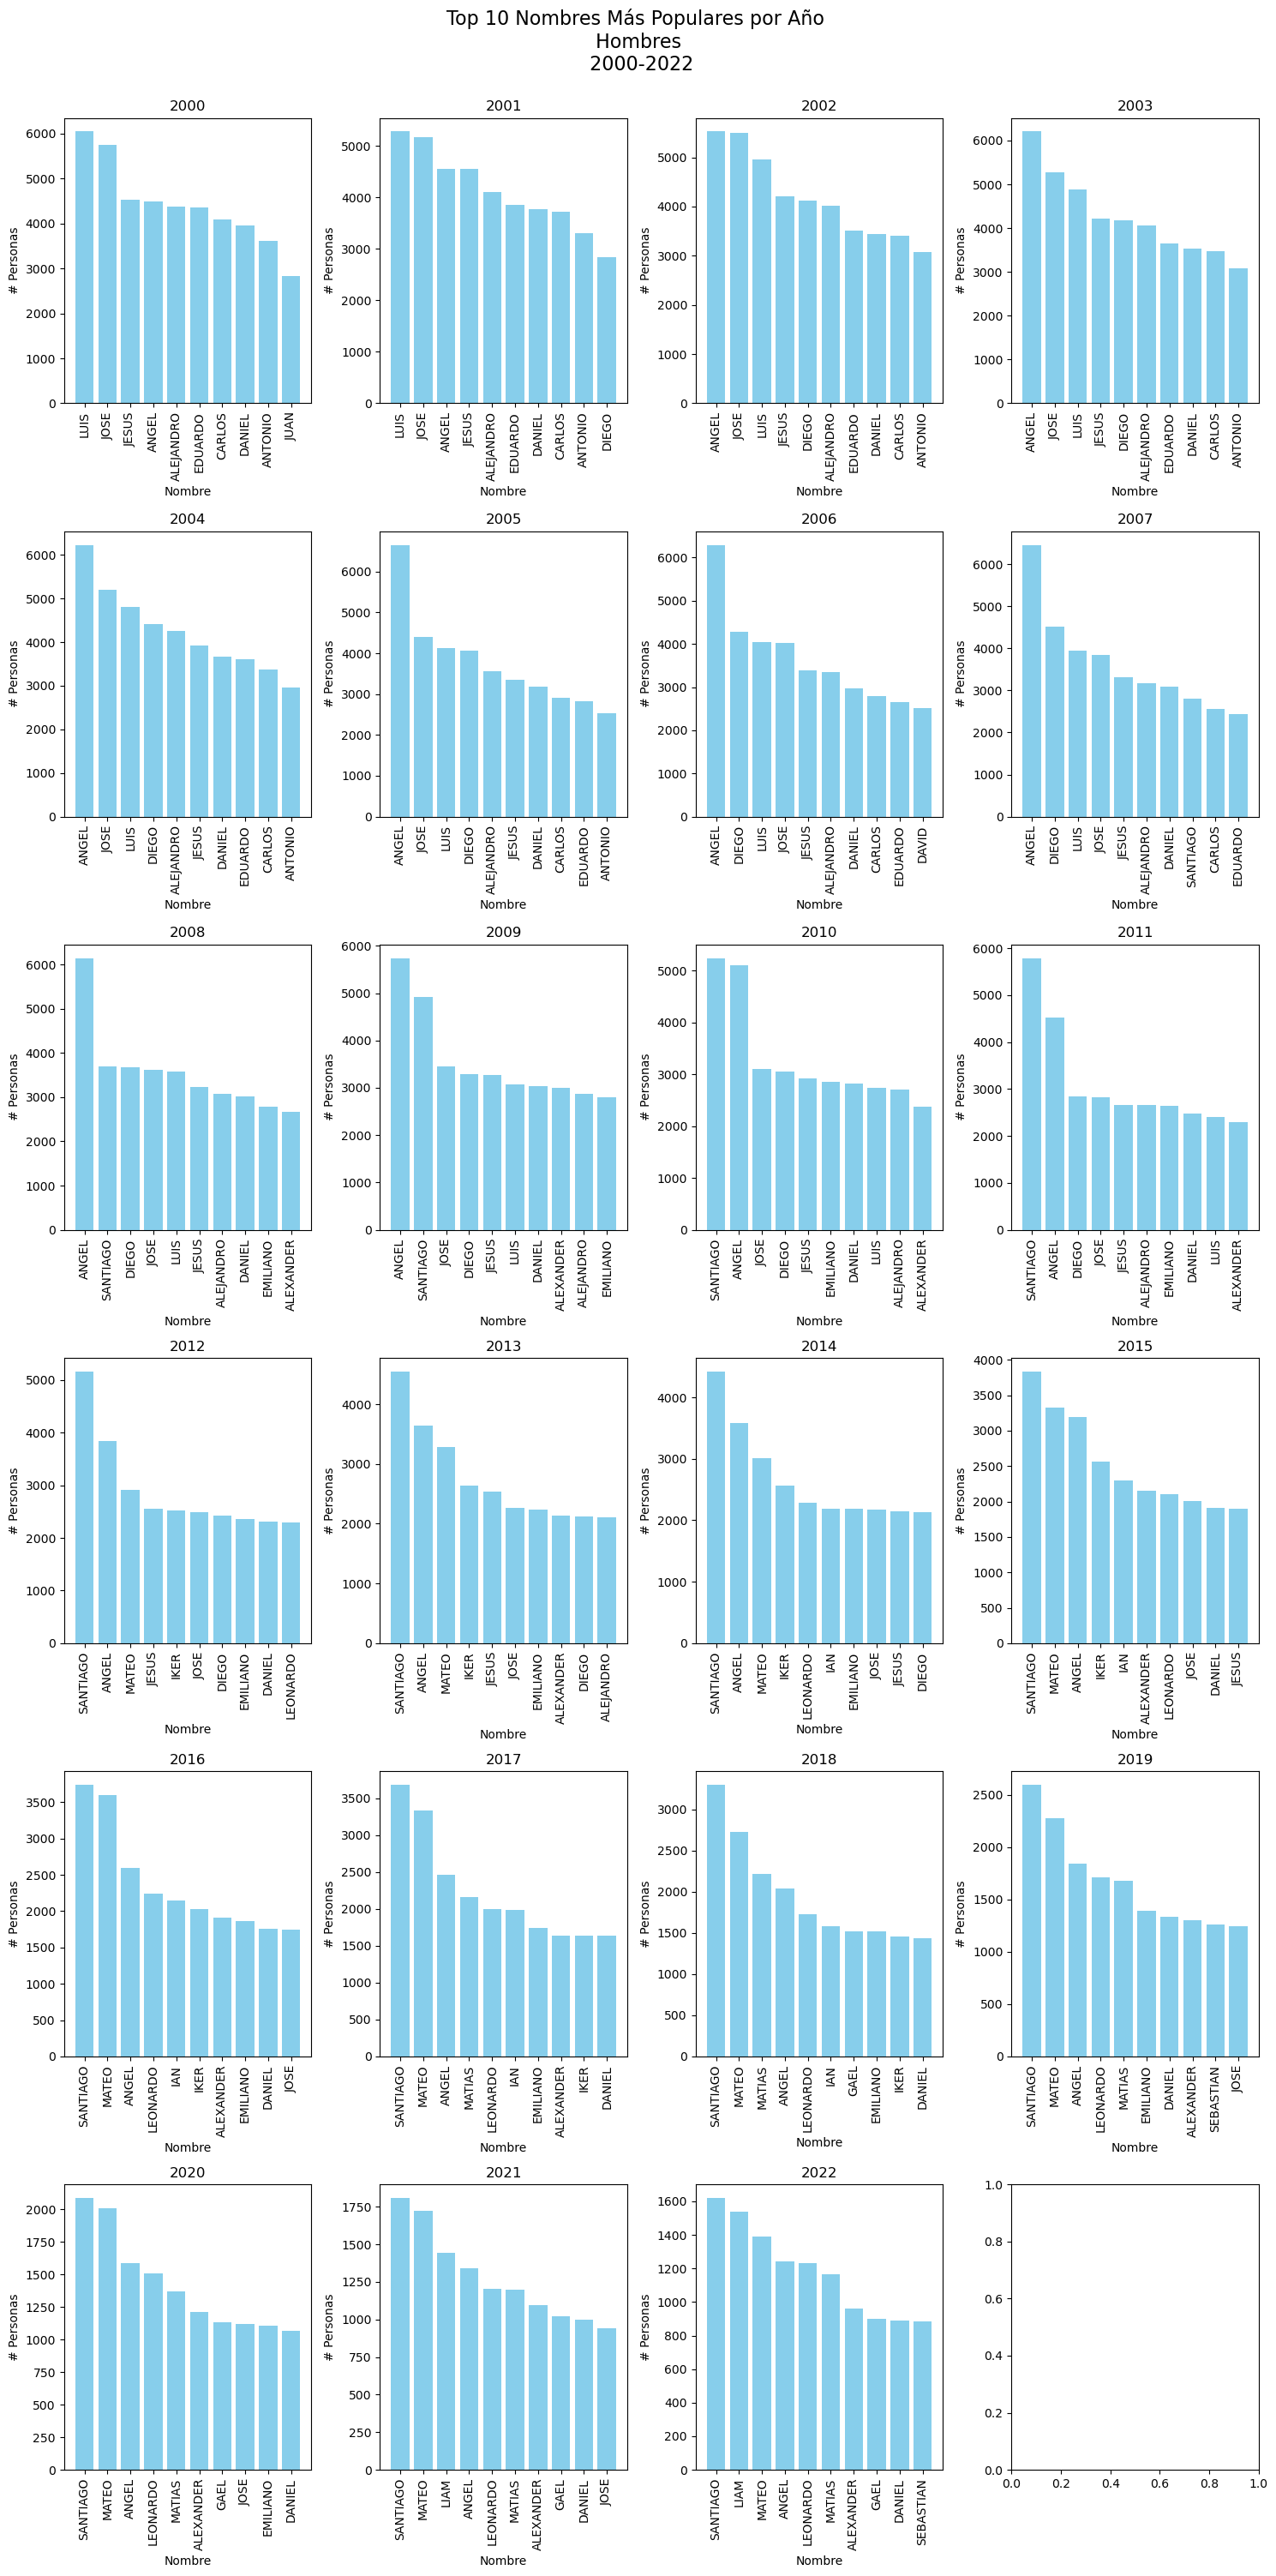

In [99]:
años = nombres_hombres_top_10_año['anio'].unique()

# Configurar el número de filas y columnas de subplots
num_filas = 6
num_columnas = 4

# Crear una nueva figura y subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 5*num_filas))

# Iterar sobre cada año y sus datos correspondientes
for i, año in enumerate(años):
    # Seleccionar los nombres y las cantidades para el año actual
    datos_año = nombres_hombres_top_10_año[nombres_hombres_top_10_año['anio'] == año]
    nombres = datos_año['nombre']
    cantidades = datos_año['personas']
    
    # Calcular la posición del subplot actual
    fila = i // num_columnas
    columna = i % num_columnas
    
    # Crear la subgráfica de barras para el año actual
    axs[fila, columna].bar(nombres, cantidades, color='skyblue')
    
    # Configurar título y etiquetas
    axs[fila, columna].set_title(f'{año}')
    axs[fila, columna].set_xlabel('Nombre')
    axs[fila, columna].set_ylabel('# Personas')
    axs[fila, columna].tick_params(axis='x', rotation=90)
    #axs[fila, columna].invert_yaxis()  # Invertir el eje y para mostrar los nombres en orden descendente

# Ajustar el diseño de los subplots
plt.suptitle('Top 10 Nombres Más Populares por Año \n Hombres \n 2000-2022', fontsize=16, y=1)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Veamos como ha cambiado la tendencia para mi nombre

<Axes: title={'center': 'Jorge'}, xlabel='anio'>

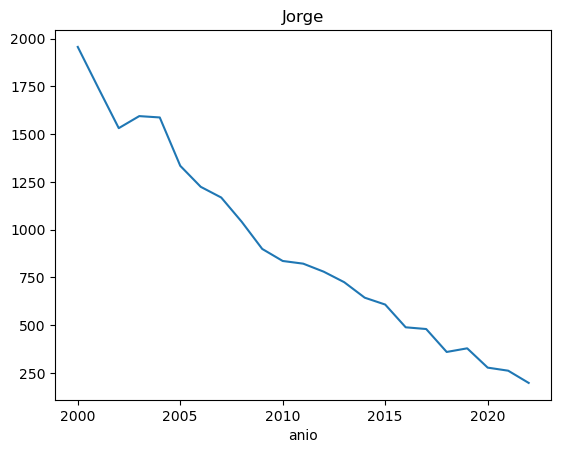

In [126]:
nombres_hombres[nombres_hombres['nombre'] == 'JORGE'].plot(x='anio', y='personas', kind='line', legend=False, title = 'Jorge')

<Axes: title={'center': 'Ximena'}, xlabel='anio'>

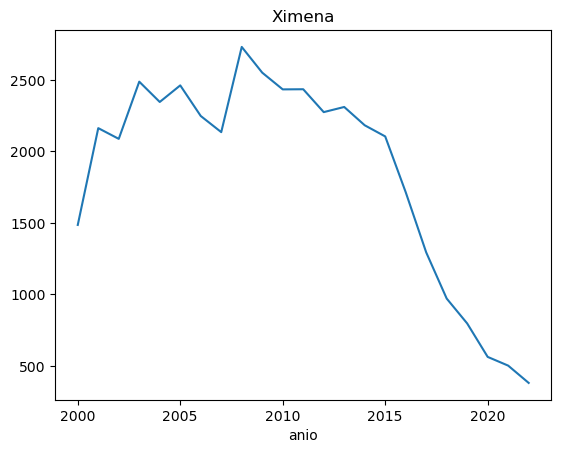

In [130]:
nombres_mujeres[nombres_mujeres['nombre'] == 'XIMENA'].plot(x='anio', y='personas', kind='line', legend=False, title = 'Ximena')

Ahora veamos qué tan diversos han sido los nombres de los hombres en comparación a los de las mujeres en todo el periodo.

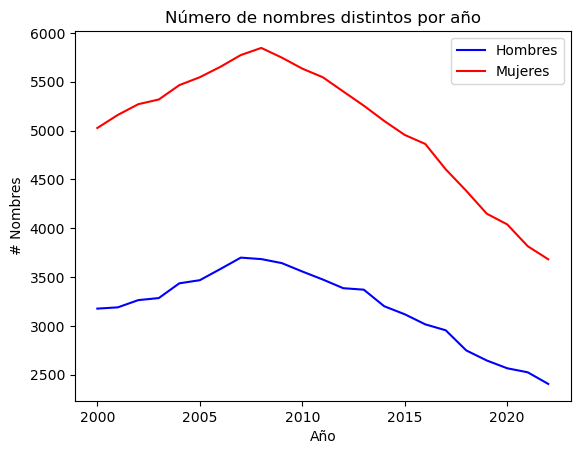

In [151]:
nombres_distintos_hombres = df_sin_2023[df_sin_2023['sexo'] == 'Hombre'].groupby(['anio', 'sexo'])['nombre'].count().reset_index()
plt.plot(nombres_distintos_hombres['anio'], nombres_distintos_hombres['nombre'], label = 'Hombres', color='blue')

nombres_distintos_mujeres = df_sin_2023[df_sin_2023['sexo'] == 'Mujer'].groupby(['anio', 'sexo'])['nombre'].count().reset_index()
plt.plot(nombres_distintos_mujeres['anio'], nombres_distintos_mujeres['nombre'], label = 'Mujeres', color='red')

plt.title('Número de nombres distintos por año')
plt.xlabel('Año')
plt.ylabel('# Nombres')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

In [160]:
df_sin_na = df.dropna(subset=['nombre'])

def obtener_ultima_letra(x):
    return x[-1]

ultimas_letras = df_sin_na["nombre"].map(obtener_ultima_letra)
ultimas_letras.name = "Última letra"

tabla = df_sin_na.pivot_table("personas", index=ultimas_letras,
                          columns=["sexo", "anio"], aggfunc=sum)

C:\Users\User\AppData\Local\Temp\ipykernel_13252\2129448024.py:9: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  tabla = df_sin_na.pivot_table("personas", index=ultimas_letras,


In [162]:
subtabla = tabla.reindex(columns=[2000, 2010, 2020], level="anio")

In [164]:
prop_letra = subtabla / subtabla.sum()

[]

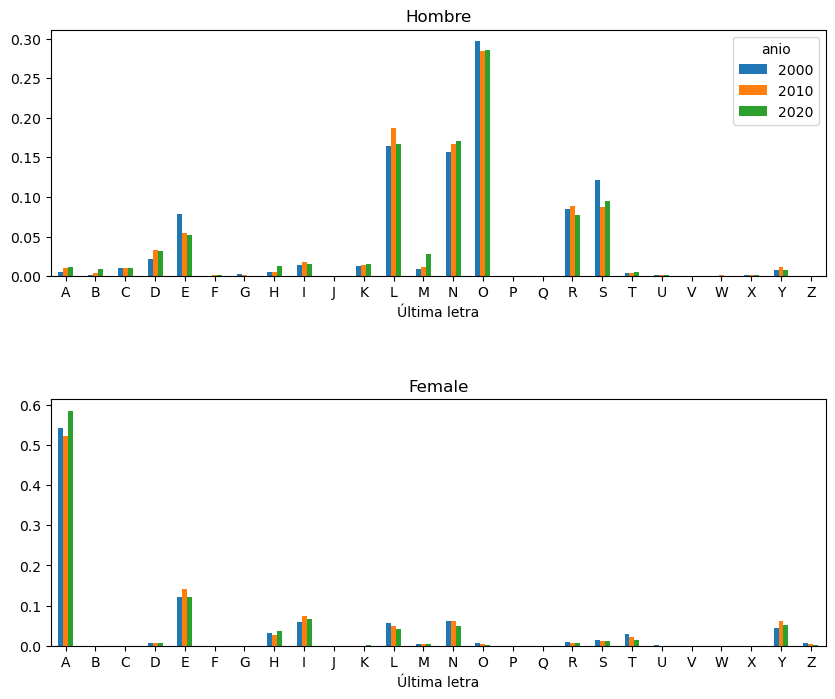

In [170]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'hspace': 0.5})

prop_letra["Hombre"].plot(kind="bar", rot=0, ax=axes[0], title="Hombre")

prop_letra["Mujer"].plot(kind="bar", rot=0, ax=axes[1], title="Female",
                      legend=False)
plt.plot()

## Conclusiones

In [11]:
df

,fecha,anio,sexo,nombre,personas,prop
0,2000-12-31,2000,Hombre,A,6,0.000034
1,2000-12-31,2000,Hombre,AARON,525,0.003001
2,2000-12-31,2000,Hombre,AB,1,0.000006
3,2000-12-31,2000,Hombre,ABAD,10,0.000057
4,2000-12-31,2000,Hombre,ABAN,3,0.000017
...,...,...,...,...,...,...
191987,2023-12-31,2023,Mujer,ZOEY,1,0.000398
191988,2023-12-31,2023,Mujer,ZULAY,1,0.000398
191989,2023-12-31,2023,Mujer,ZULEYKA,1,0.000398
191990,2023-12-31,2023,Mujer,ZULY,1,0.000398


In [12]:
df.groupby(['anio', 'sexo'])['prop'].sum()

anio  sexo  
2000  Hombre    1.0
      Mujer     1.0
2001  Hombre    1.0
      Mujer     1.0
2002  Hombre    1.0
      Mujer     1.0
2003  Hombre    1.0
      Mujer     1.0
2004  Hombre    1.0
      Mujer     1.0
2005  Hombre    1.0
      Mujer     1.0
2006  Hombre    1.0
      Mujer     1.0
2007  Hombre    1.0
      Mujer     1.0
2008  Hombre    1.0
      Mujer     1.0
2009  Hombre    1.0
      Mujer     1.0
2010  Hombre    1.0
      Mujer     1.0
2011  Hombre    1.0
      Mujer     1.0
2012  Hombre    1.0
      Mujer     1.0
2013  Hombre    1.0
      Mujer     1.0
2014  Hombre    1.0
      Mujer     1.0
2015  Hombre    1.0
      Mujer     1.0
2016  Hombre    1.0
      Mujer     1.0
2017  Hombre    1.0
      Mujer     1.0
2018  Hombre    1.0
      Mujer     1.0
2019  Hombre    1.0
      Mujer     1.0
2020  Hombre    1.0
      Mujer     1.0
2021  Hombre    1.0
      Mujer     1.0
2022  Hombre    1.0
      Mujer     1.0
2023  Hombre    1.0
      Mujer     1.0
Name: prop, dtype: float64

In [13]:
def get_top_1000(group):
    return group.sort_values('personas', ascending=False)[:1000]

In [14]:
top_1000 = df.groupby(['anio', 'sexo'])

In [15]:
top_1000 = top_1000.apply(get_top_1000)

In [23]:
filtro = (top_1000['sexo']=='Hombre') & (top_1000['anio']==2000)

In [25]:
top_1000[filtro].head()

fecha  anio    sexo     nombre  personas      prop
anio sexo                                                                
2000 Hombre 2083  2000-12-31  2000  Hombre       LUIS      6047  0.034562
            1802  2000-12-31  2000  Hombre       JOSE      5745  0.032836
            1679  2000-12-31  2000  Hombre      JESUS      4521  0.025840
            294   2000-12-31  2000  Hombre      ANGEL      4495  0.025691
            162   2000-12-31  2000  Hombre  ALEJANDRO      4379  0.025028

In [26]:
filtro = (top_1000['sexo']=='Hombre') & (top_1000['anio']==2022)

In [27]:
top_1000[filtro].head()

fecha  anio    sexo    nombre  personas      prop
anio sexo                                                                 
2022 Hombre 186610  2022-12-31  2022  Hombre  SANTIAGO      1620  0.026848
            186114  2022-12-31  2022  Hombre      LIAM      1536  0.025456
            186219  2022-12-31  2022  Hombre     MATEO      1388  0.023003
            184813  2022-12-31  2022  Hombre     ANGEL      1240  0.020551
            186101  2022-12-31  2022  Hombre  LEONARDO      1230  0.020385

In [30]:
top_1000[top_1000['sexo']=='Hombre'].head()

fecha  anio    sexo     nombre  personas      prop
anio sexo                                                                
2000 Hombre 2083  2000-12-31  2000  Hombre       LUIS      6047  0.034562
            1802  2000-12-31  2000  Hombre       JOSE      5745  0.032836
            1679  2000-12-31  2000  Hombre      JESUS      4521  0.025840
            294   2000-12-31  2000  Hombre      ANGEL      4495  0.025691
            162   2000-12-31  2000  Hombre  ALEJANDRO      4379  0.025028

In [37]:
top_1000 = top_1000.reset_index(drop=True)

In [41]:
top_1000[top_1000['anio']==2023]

,fecha,anio,sexo,nombre,personas,prop
46000,2023-12-31,2023,Hombre,LIAM,67,0.026524
46001,2023-12-31,2023,Hombre,SANTIAGO,62,0.024545
46002,2023-12-31,2023,Hombre,ALEXANDER,56,0.022169
46003,2023-12-31,2023,Hombre,MATEO,54,0.021378
46004,2023-12-31,2023,Hombre,SEBASTIAN,44,0.017419
...,...,...,...,...,...,...
47298,2023-12-31,2023,Mujer,HOPE,1,0.000398
47299,2023-12-31,2023,Mujer,HILDA,1,0.000398
47300,2023-12-31,2023,Mujer,HERMIONE,1,0.000398
47301,2023-12-31,2023,Mujer,HELEN,1,0.000398


In [42]:
top_1000

,fecha,anio,sexo,nombre,personas,prop
0,2000-12-31,2000,Hombre,LUIS,6047,0.034562
1,2000-12-31,2000,Hombre,JOSE,5745,0.032836
2,2000-12-31,2000,Hombre,JESUS,4521,0.025840
3,2000-12-31,2000,Hombre,ANGEL,4495,0.025691
4,2000-12-31,2000,Hombre,ALEJANDRO,4379,0.025028
...,...,...,...,...,...,...
47298,2023-12-31,2023,Mujer,HOPE,1,0.000398
47299,2023-12-31,2023,Mujer,HILDA,1,0.000398
47300,2023-12-31,2023,Mujer,HERMIONE,1,0.000398
47301,2023-12-31,2023,Mujer,HELEN,1,0.000398
